# MNE-Python: From raw data to epochs and evoked responses (ERF/ERP)

`
Authors:
Alexandre Gramfort
Denis A. Engemann
Jona Sassenhagen
Richard Höchenberger
`

In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

First, load the mne package:

In [3]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.5 MB 21.8 MB/s 


In [4]:
import mne

We set the logging level to 'warning' so the output will be less verbose and we can focus on the important bits 🧐

In [5]:
mne.set_log_level('warning')

### Remember: If you need help, just ask... the machine!

In [12]:
mne.pick_types?

## Access raw data

Now we import the `sample` dataset.

It will be downloaded automatically (approx. 2 GB)

In [7]:
from mne.datasets import sample
data_path = sample.data_path()

raw_fname = os.path.join(data_path, 'MEG/sample/sample_audvis_filt-0-40_raw.fif')

In [8]:
print(raw_fname)

/root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif


Read data from file:

In [9]:
mne.io.read_raw_fif?

In [13]:
raw = mne.io.read_raw_fif(raw_fname, preload=True)
print(raw)

<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~122.9 MB, data loaded>


Note that by default, the data will actually not be loaded into memory automatically to preserve memory. To actually load the data, we have to pass `preload=True`.

Now let's look at the measurement info. It will give details about:

   - sampling rate
   - filtering parameters
   - available channel types
   - bad channels
   - etc.


In [14]:
print(raw.info)

<Info | 15 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>


raw.info is just a dictionary:

In [15]:
isinstance(raw.info, dict)

True

So we can access its elements this way:

In [16]:
raw.info['sfreq']  # Sampling frequency

150.15374755859375

In [17]:
raw.info['bads']  # list of marked bad channels

['MEG 2443', 'EEG 053']

Next let's see what channels are present in the data. We simply have to take a loot at the `raw.ch_names` attribute.

In [18]:
raw.ch_names

['MEG 0113',
 'MEG 0112',
 'MEG 0111',
 'MEG 0122',
 'MEG 0123',
 'MEG 0121',
 'MEG 0132',
 'MEG 0133',
 'MEG 0131',
 'MEG 0143',
 'MEG 0142',
 'MEG 0141',
 'MEG 0213',
 'MEG 0212',
 'MEG 0211',
 'MEG 0222',
 'MEG 0223',
 'MEG 0221',
 'MEG 0232',
 'MEG 0233',
 'MEG 0231',
 'MEG 0243',
 'MEG 0242',
 'MEG 0241',
 'MEG 0313',
 'MEG 0312',
 'MEG 0311',
 'MEG 0322',
 'MEG 0323',
 'MEG 0321',
 'MEG 0333',
 'MEG 0332',
 'MEG 0331',
 'MEG 0343',
 'MEG 0342',
 'MEG 0341',
 'MEG 0413',
 'MEG 0412',
 'MEG 0411',
 'MEG 0422',
 'MEG 0423',
 'MEG 0421',
 'MEG 0432',
 'MEG 0433',
 'MEG 0431',
 'MEG 0443',
 'MEG 0442',
 'MEG 0441',
 'MEG 0513',
 'MEG 0512',
 'MEG 0511',
 'MEG 0523',
 'MEG 0522',
 'MEG 0521',
 'MEG 0532',
 'MEG 0533',
 'MEG 0531',
 'MEG 0542',
 'MEG 0543',
 'MEG 0541',
 'MEG 0613',
 'MEG 0612',
 'MEG 0611',
 'MEG 0622',
 'MEG 0623',
 'MEG 0621',
 'MEG 0633',
 'MEG 0632',
 'MEG 0631',
 'MEG 0642',
 'MEG 0643',
 'MEG 0641',
 'MEG 0713',
 'MEG 0712',
 'MEG 0711',
 'MEG 0723',
 'MEG 0722',

You can index it as a list

In [19]:
raw.ch_names[42]

'MEG 0432'

In [20]:
raw.ch_names[:10]

['MEG 0113',
 'MEG 0112',
 'MEG 0111',
 'MEG 0122',
 'MEG 0123',
 'MEG 0121',
 'MEG 0132',
 'MEG 0133',
 'MEG 0131',
 'MEG 0143']

Channel type of a specific channel

In [21]:
channel_type = mne.io.pick.channel_type(info=raw.info, idx=75)
print('Channel #75 is of type:', channel_type)

channel_type = mne.io.pick.channel_type(info=raw.info, idx=320)
print('Channel #320 is of type:', channel_type)

Channel #75 is of type: grad
Channel #320 is of type: eeg


`raw.info['chs']` contains all the details about the sensors (type, locations, coordinate frame etc.)

In [22]:
len(raw.info['chs'])

376

In [23]:
type(raw.info['chs'])

list

In [24]:
raw.info['chs'][0]

{'cal': 3.1600000394149674e-09,
 'ch_name': 'MEG 0113',
 'coil_type': 3012 (FIFFV_COIL_VV_PLANAR_T1),
 'coord_frame': 1 (FIFFV_COORD_DEVICE),
 'kind': 1 (FIFFV_MEG_CH),
 'loc': array([-0.1066    ,  0.0464    , -0.0604    , -0.0127    ,  0.0057    ,
        -0.99990302, -0.186801  , -0.98240298, -0.0033    , -0.98232698,
         0.18674099,  0.013541  ]),
 'logno': 113,
 'range': 1.0,
 'scanno': 1,
 'unit': 201 (FIFF_UNIT_T_M),
 'unit_mul': 0 (FIFF_UNITM_NONE)}

In [25]:
raw.info['chs'][330]

{'cal': 0.0001875000016298145,
 'ch_name': 'EEG 016',
 'coil_type': 1 (FIFFV_COIL_EEG),
 'coord_frame': 4 (FIFFV_COORD_HEAD),
 'kind': 2 (FIFFV_EEG_CH),
 'loc': array([ 0.06725728,  0.05876905,  0.0723644 ,  0.00235201,  0.11096951,
        -0.03500458,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ]),
 'logno': 16,
 'range': 1.0,
 'scanno': 331,
 'unit': 107 (FIFF_UNIT_V),
 'unit_mul': 0 (FIFF_UNITM_NONE)}

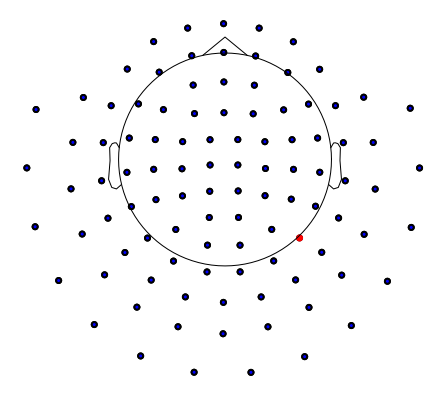

In [26]:
raw.plot_sensors(kind='topomap', ch_type='grad');

## Accessing the data

To access the data, just use the `[]` syntax as to access any element of a list, dict etc.

In [27]:
start, stop = 0, 10
data, times = raw[:, start:stop]  # fetch all channels and the first 10 time points
print(data.shape)
print(times.shape)

(376, 10)
(10,)


In [28]:
times

array([0.        , 0.00665984, 0.01331968, 0.01997952, 0.02663936,
       0.0332992 , 0.03995904, 0.04661888, 0.05327872, 0.05993856])

Note that it returns both the data and the times array.

# Visualizing raw data

Note : we will use the QT backend from matplotlib that will open a separate window.

In [32]:
!pip install PyQt5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.4 MB 15.9 MB/s 
     |████████████████████████████████| 344 kB 42.4 MB/s 
     |████████████████████████████████| 59.9 MB 103 kB/s 


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


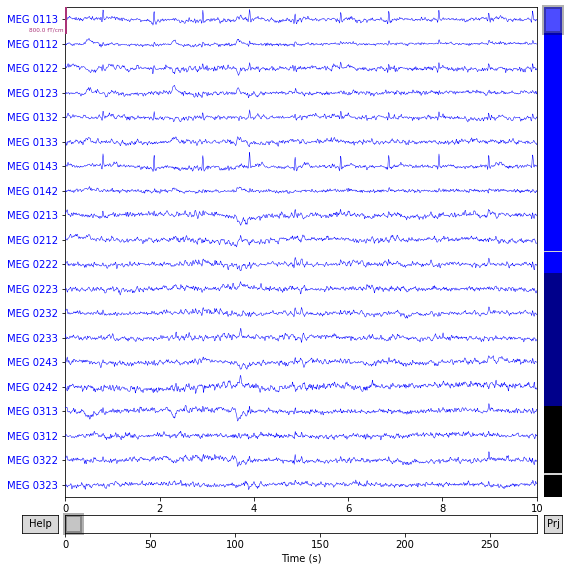

In [34]:
#%matplotlib qt
fig = raw.plot()

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


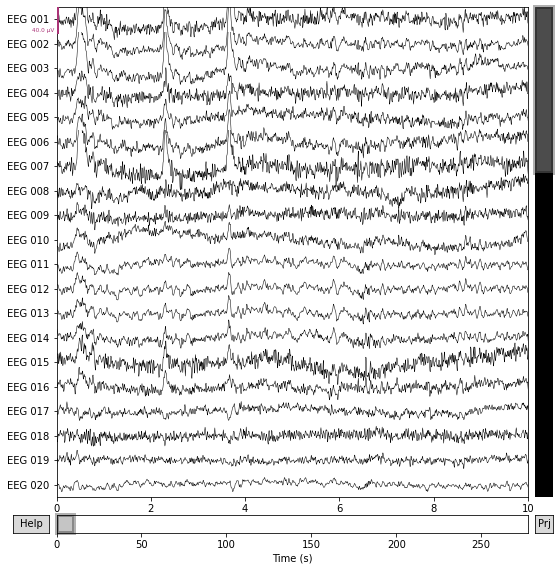

In [35]:
fig = raw.copy().pick_types(meg=False, eeg=True).plot()

## Filtering

In [36]:
raw = mne.io.read_raw_fif(raw_fname, preload=True)

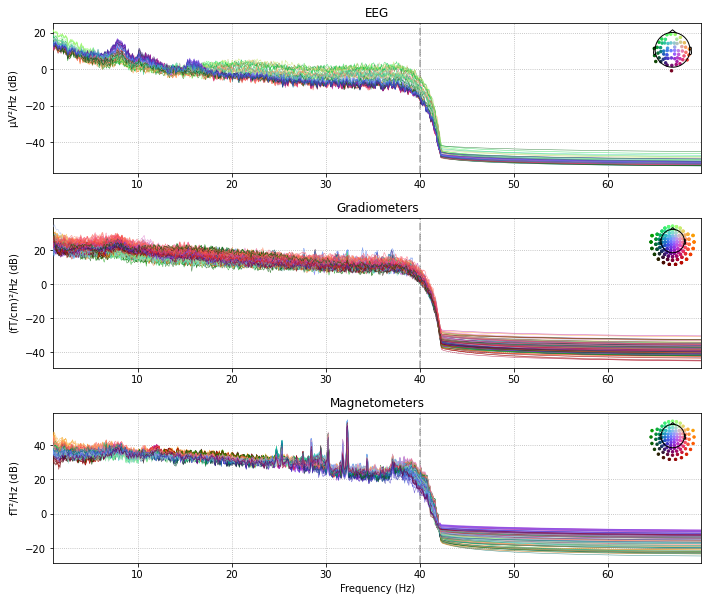

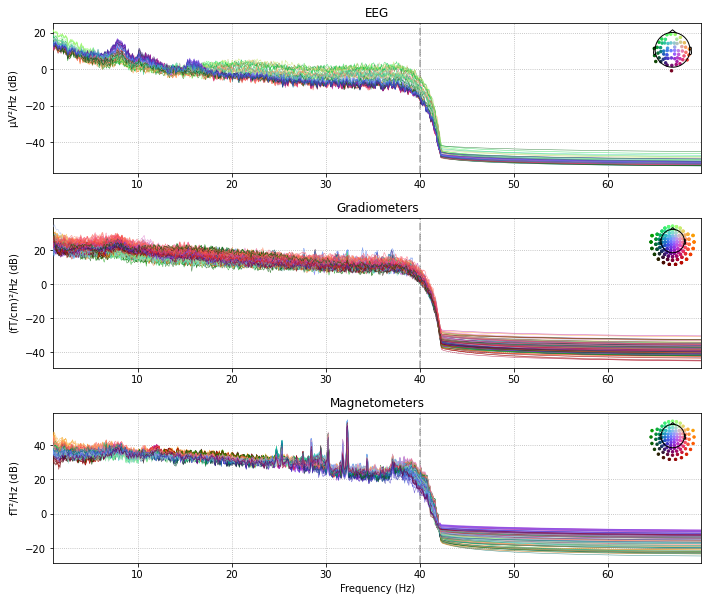

In [43]:
raw.plot_psd(fmin=1, fmax=70)

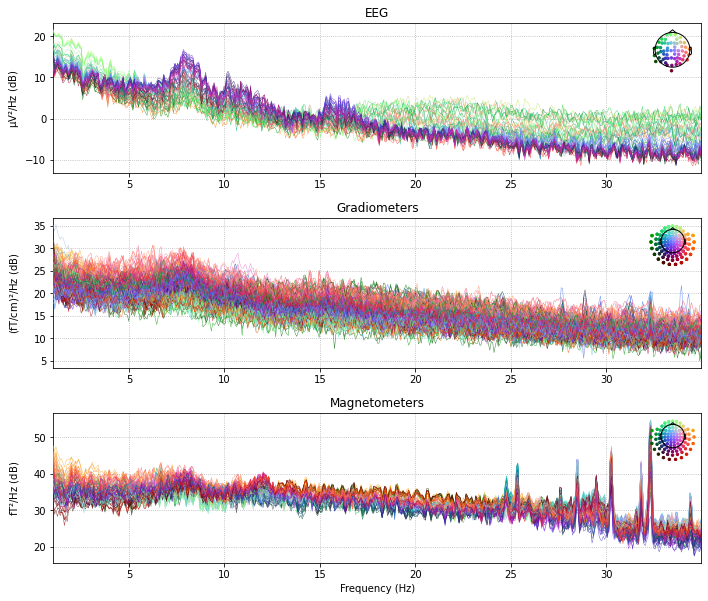

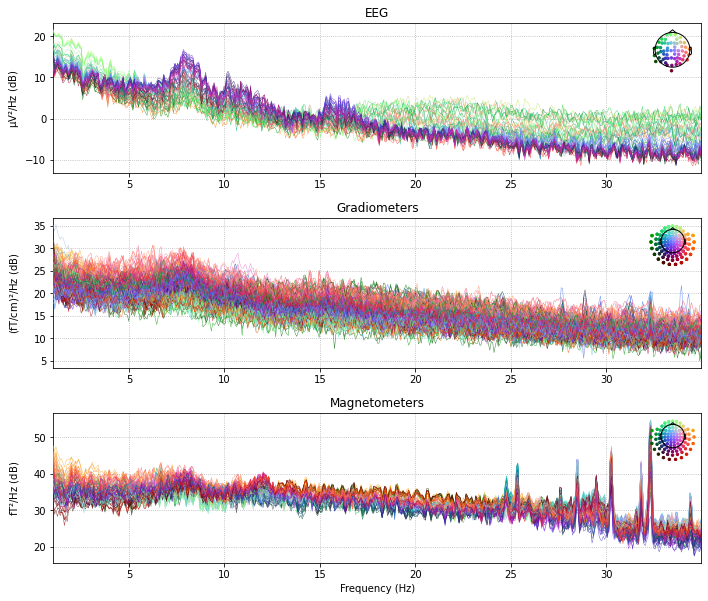

In [44]:
# [P] See the low frequencies
raw.plot_psd(fmin=1, fmax=35)

In [37]:
raw_beta = raw.copy().filter(l_freq=13, h_freq=30, verbose=True)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 153 samples (1.019 sec)



In [38]:
print(raw_beta.info)  # note the update of raw.info['lowpass'] and raw.info['highpass']

<Info | 15 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 13.0 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 30.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


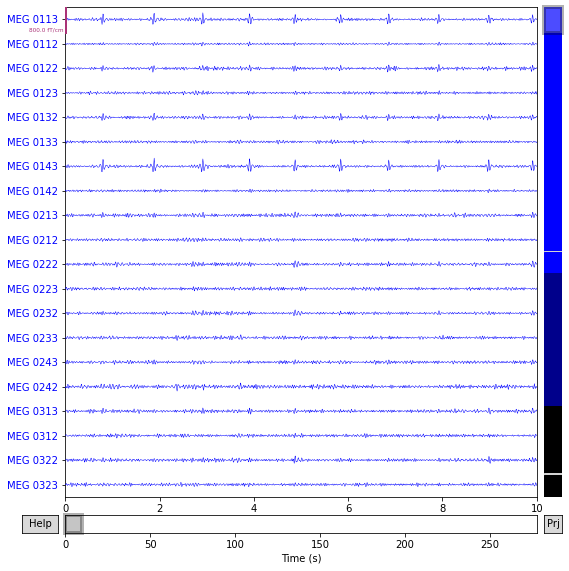

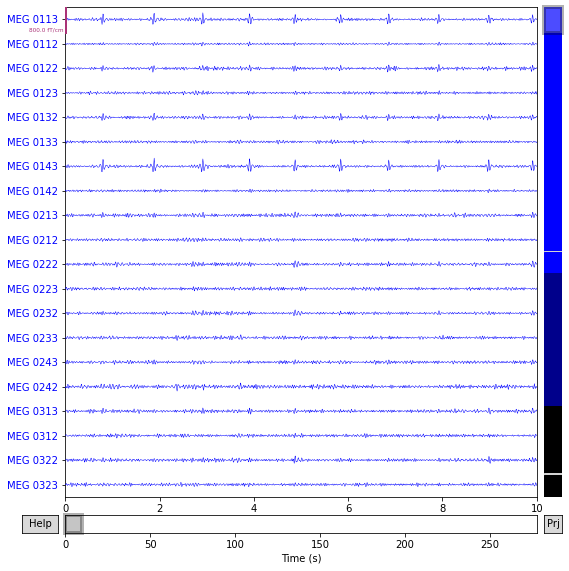

In [39]:
raw_beta.plot()

In [40]:
raw_beta.filter?

### Exercise
Plot the 10 first seconds of the stimutation channel `STI 014` just using matplotlib.

Tips:

- Find the channel index using `raw.ch_names.index('STI 014')`
- Get the data for this channel
- Plot it using `plt.plot`

## Define and read epochs

### First, extract events.

In [42]:
events = mne.find_events(raw, stim_channel='STI 014', verbose=True)

319 events found
Event IDs: [ 1  2  3  4  5 32]


In [45]:
events.shape

(319, 3)

In [46]:
type(events)

numpy.ndarray

In [47]:
print(events[:5])  # events is a 2d array, (time, previous, trigger)

# [P] For example, at sample 69994 there was a stimulation of type 2 (it has been shown num 2)

[[6994    0    2]
 [7086    0    3]
 [7192    0    1]
 [7304    0    4]
 [7413    0    2]]


In [78]:
tipologia_che_stimola = 4
len(events[events[:, 2] == tipologia_che_stimola])
# [P] tipologia_che_stimola = 1, 2, ., 5, 32
# [P] these are the number of times the "tipologia_che_stimola" type stimuli
# were shown to the subject in 6 minutes, obviously for each type

70

In [49]:
len(events)

319

Let's visualize the paradigm:

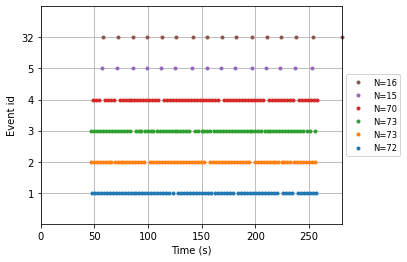

In [50]:
%matplotlib inline
fig = mne.viz.plot_events(events, sfreq=raw.info['sfreq'])

# [P] Visualization of when and what stimuli were shown to the subject over time
# [P] This is concordant with the above material

For describing which event IDs code for which experimental events or conditions, we use a Python dictionary to store the mapping. The dictionary keys can contain `/` for grouping of sub-conditions.

<ipython-input-51-5b6635ff5da5>:4: RuntimeWarning: event 5 missing from event_id will be ignored
  fig = mne.viz.plot_events(events, sfreq=raw.info['sfreq'], event_id=event_id)
<ipython-input-51-5b6635ff5da5>:4: RuntimeWarning: event 32 missing from event_id will be ignored
  fig = mne.viz.plot_events(events, sfreq=raw.info['sfreq'], event_id=event_id)


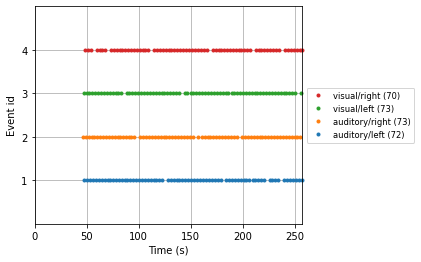

In [51]:
# [P] What kind of stimuli are the stimuli made to people?
# [P] They are represented in a dict:
event_id = {"visual/left": 3, "visual/right": 4,
            "auditory/left": 1, "auditory/right": 2}

fig = mne.viz.plot_events(events, sfreq=raw.info['sfreq'], event_id=event_id)

The events can be visualized together with the raw data:

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


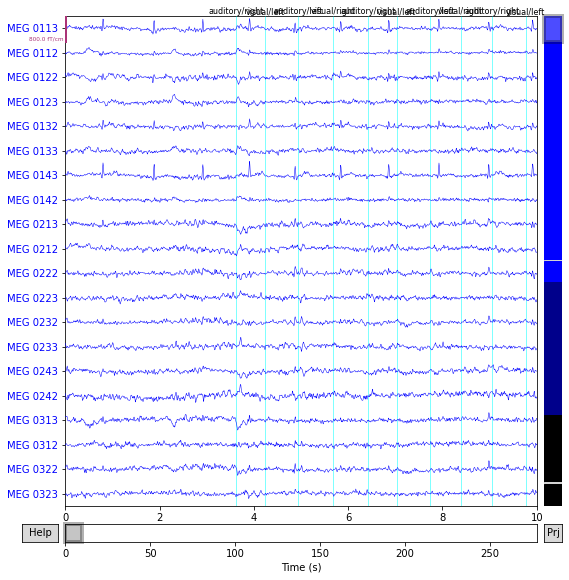

In [52]:
fig = raw.plot(event_id=event_id, events=events)

### Create epochs

First, define parameters: start, stop, and baseline period of the epochs.

In [ ]:
# [P] Given the whole signal, we extract the piece of signal that includes the experience
# of an event: if person A at minute 1 heard something, we take the signal just before
# the minute and just after. This signal fragment is called the epoch (of course 
# we extract all of them for each event, e.g. if person A saw an image at each minute 
# (1, 2, 3, ..) we extract [0.9, 1.1], [1.9, 2.1], [2.9, 3.1], ..).

In [53]:
tmin = -0.2  # start of each epoch (200ms before the trigger)
tmax = 0.5   # end of each epoch (500ms after the trigger)
baseline = (None, 0)  # from the first time instant to the trigger pulse

Define peak-to-peak (amplitude range) rejection parameters for gradiometers, magnetometers, and EOG:

In [54]:
reject = dict(grad=4000e-13, mag=4e-12, eog=150e-6)  # this can be highly data dependent

In [55]:
# we are picky again, this time we select MEG and EOG channels
picks_meg = mne.pick_types(raw.info, meg=True, eeg=False, eog=True,
                           stim=False, exclude='bads')

Extract epochs:

In [56]:
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,
                    picks=picks_meg, baseline=baseline,
                    reject=reject)

In [57]:
print(epochs)

<Epochs |  288 events (good & bad), -0.199795 - 0.499488 sec, baseline -0.199795 – 0 sec, ~3.2 MB, data not loaded,
 'visual/left': 73
 'visual/right': 70
 'auditory/left': 72
 'auditory/right': 73>


Remove bad epochs based on the `reject` parameter we passed to `Epochs`.

In [58]:
epochs.drop_bad()

<Epochs |  239 events (all good), -0.199795 - 0.499488 sec, baseline -0.199795 – 0 sec, ~3.2 MB, data not loaded,
 'visual/left': 67
 'visual/right': 56
 'auditory/left': 55
 'auditory/right': 61>

Explore the epochs namespace

Hit ``epochs.<TAB>``

In [109]:
epochs
# [P] Each epoch is associated to a specific event

<Epochs |  239 events (all good), -0.199795 - 0.499488 sec, baseline -0.199795 – 0 sec, ~3.2 MB, data not loaded,
 'visual/left': 67
 'visual/right': 56
 'auditory/left': 55
 'auditory/right': 61>

In [110]:
# [P] Target, what we want to predict
y = epochs.events[:, 2]
y
# [P] As we see the only events we want to predict are of 4 types, the ones we saw earlier

array([3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 3, 1, 4, 2, 3, 1, 4, 2,
       3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 2, 3, 1, 2, 4, 2, 3, 1, 4, 2, 3, 1,
       4, 2, 3, 1, 4, 2, 2, 3, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 3,
       1, 4, 2, 1, 4, 2, 3, 1, 4, 2, 3, 1, 2, 3, 4, 2, 3, 1, 2, 3, 1, 4,
       2, 3, 1, 4, 2, 3, 4, 2, 3, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 2,
       3, 1, 4, 2, 1, 4, 3, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 3, 4, 2,
       3, 1, 4, 3, 1, 4, 2, 3, 4, 1, 2, 3, 1, 2, 3, 4, 2, 3, 4, 3, 1, 4,
       3, 4, 3, 3, 4, 2, 3, 1, 2, 3, 1, 4, 2, 3, 1, 4, 1, 4, 2, 3, 1, 4,
       2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 2, 3, 2, 3, 1, 4, 2, 3, 4, 3, 1,
       4, 2, 3, 4, 2, 3, 1, 4, 2, 3, 1, 2, 2, 3, 2, 3, 2, 3, 1, 4, 2, 3,
       1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 1, 3, 1, 4])

In [116]:
X = epochs.load_data().copy().pick('grad').get_data()

In [117]:
X.shape, y.shape

((239, 203, 106), (239,))

In [114]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [115]:
from sklearn.neighbors import NearestCentroid

In [ ]:
# [P] Let's try an auditory vs. visual classification (this should be easy)

In [143]:
X = epochs.load_data().copy().pick('grad').get_data()
y = epochs.events[:,2]
mask = np.logical_or(y==1, y==3)
X = X[mask]
y = y[mask]
X.shape, y.shape

((122, 203, 106), (122,))

In [119]:
y
# [P] We have only two labels

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3, 1, 3, 3, 1, 3,
       1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 1, 3,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 3, 1, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 1, 3, 3, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1])

In [144]:
from sklearn.model_selection import cross_val_score 
from sklearn.dummy import DummyClassifier

cv = 5
clf = DummyClassifier()
# [P] Dummy classification predicts the most frequent class (the majority class)
scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
print(f'mean = {np.mean(scores)} -- std ) {np.std(scores)}')

mean = 0.5489999999999999 -- std ) 0.00898146239020503


In [145]:
# [P] You have to re-shape things here
XX = np.reshape(X, (len(X), -1))
print(XX.shape)

clf = NearestCentroid()
scores = cross_val_score(clf, XX, y, cv=cv, scoring='accuracy')
print(f'mean = {np.mean(scores)} -- std ) {np.std(scores)}')

(122, 21518)
mean = 1.0 -- std ) 0.0


In [129]:
# [P] Wow, it's 1.0, it's great (almost too cool)

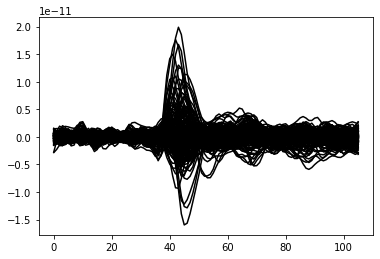

In [130]:
plt.plot(np.mean(X[y==1], axis=0).T, 'k');

In [ ]:
# [P] The brain maximizes its response at a given time

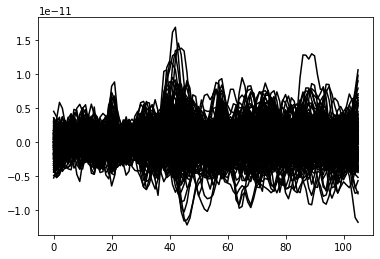

In [131]:
# [P] Average of only 5 trials
plt.plot(np.mean(X[y==1][:5], axis=0).T, 'k');

In [ ]:
# [P] Here we are showing that by considering fewer trials we have more noise!
# [P] Here we are only counting 5 trials, earlier we considered all of them (we made an average, out of all of them)

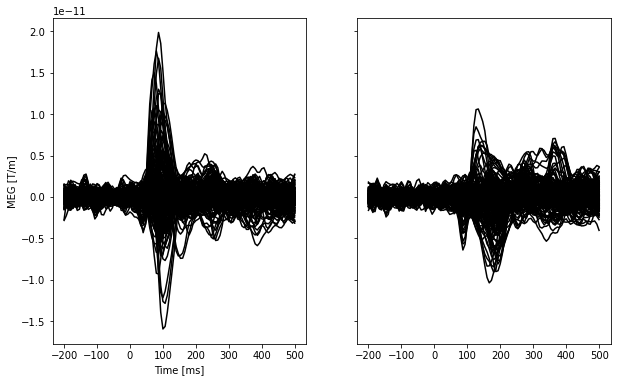

In [146]:
# [P] left: auditory, right: visual stimulation
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,6), sharey=True)
ax1.plot(1e3 * epochs.times, np.mean(X[y==1], axis=0).T, 'k');
ax2.plot(1e3 * epochs.times, np.mean(X[y==3], axis=0).T, 'k');
ax1.set_ylabel('MEG [T/m]');
ax1.set_xlabel('Time [ms]');

In [ ]:
# [P] They seem to live at different moments
# [P] And so it is TOO EASY to classify these two (hence the 100% score)

In [135]:
# [P] Let us try to divide two auditory conditions:

X = epochs.load_data().copy().pick('grad').get_data()
y = epochs.events[:,2]
mask = np.logical_or(y==1, y==2)
X = X[mask]
y = y[mask]
X.shape, y.shape

# [P] You have to re-shape things here
XX = np.reshape(X, (len(X), -1))
print(XX.shape)

clf = NearestCentroid()
scores = cross_val_score(clf, XX, y, cv=cv, scoring='accuracy')
print(f'mean = {np.mean(scores)} -- std ) {np.std(scores)}')

## [P] Here we don't see that it is so simple! The score is not that big

(116, 21518)
mean = 0.7663043478260869 -- std ) 0.07731921410338582


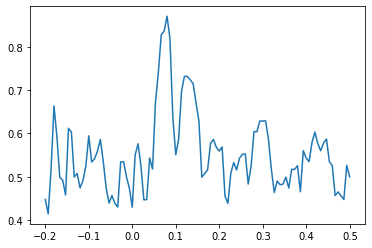

In [136]:
cv = 5
clf = NearestCentroid()

cv_scores = []
for t in range(X.shape[-1]): #iterate in time dimension
  scores = cross_val_score(clf, X[:, :, t], y, cv=5, scoring='accuracy')
  cv_scores.append(np.mean(scores))

plt.plot(epochs.times, cv_scores)

In [ ]:
# [P] WHAT ARE WE SEEING
# [P] Performance of the classifier when fed with different data points
# [P] What exactly do we see: the moment of interest is at that peak between 0 and 0.2

(123, 21518)
mean = 0.9916666666666668 -- std ) 0.016666666666666653


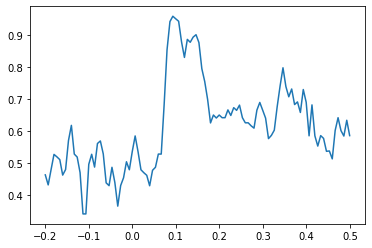

In [147]:
# [P] Let us try to divide two vision conditions:

X = epochs.load_data().copy().pick('grad').get_data()
y = epochs.events[:,2]
mask = np.logical_or(y==3, y==4)
X = X[mask]
y = y[mask]
X.shape, y.shape

# [P] You have to re-shape things here
XX = np.reshape(X, (len(X), -1))
print(XX.shape)

clf = NearestCentroid()
scores = cross_val_score(clf, XX, y, cv=cv, scoring='accuracy')
print(f'mean = {np.mean(scores)} -- std ) {np.std(scores)}')

cv = 5
clf = NearestCentroid()

cv_scores = []
for t in range(X.shape[-1]): #iterate in time dimension
  scores = cross_val_score(clf, X[:, :, t], y, cv=5, scoring='accuracy')
  cv_scores.append(np.mean(scores))

plt.plot(epochs.times, cv_scores)

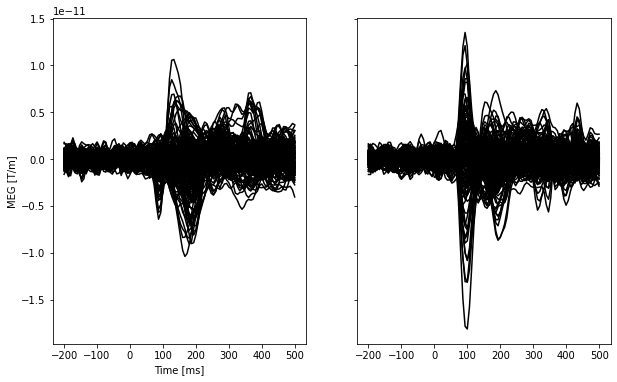

In [148]:
# [P] left: auditory, right: visual stimulation
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,6), sharey=True)
ax1.plot(1e3 * epochs.times, np.mean(X[y==3], axis=0).T, 'k');
ax2.plot(1e3 * epochs.times, np.mean(X[y==4], axis=0).T, 'k');
ax1.set_ylabel('MEG [T/m]');
ax1.set_xlabel('Time [ms]');

See how epochs were dropped

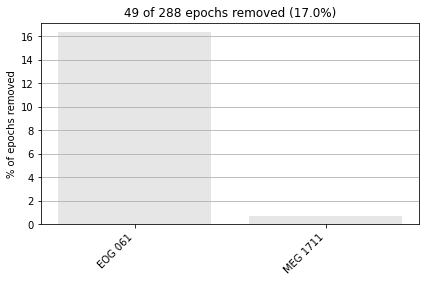

In [59]:
fig = epochs.plot_drop_log()

### Visualization Epochs

See [this page](https://mne.tools/stable/auto_tutorials/epochs/plot_visualize_epochs.html) for options on how to visualize epochs.

Here is just an illustration to make a so-called ERP/ERF image:

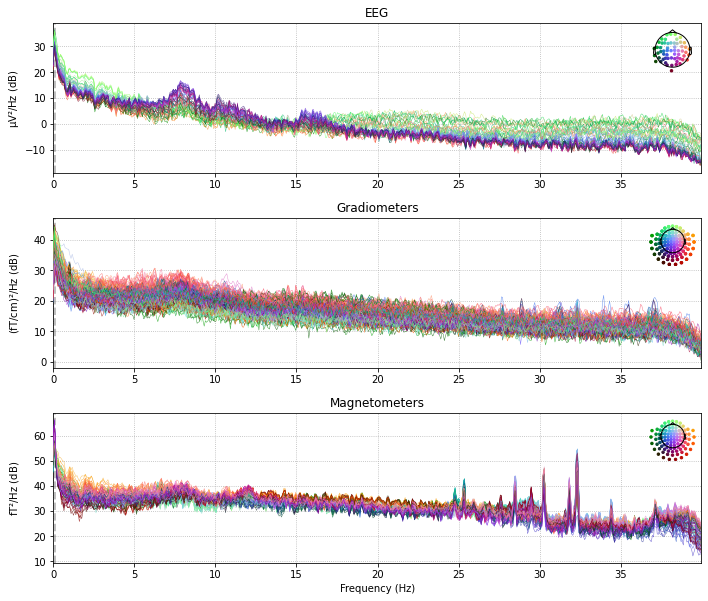

In [60]:
fig = raw.plot_psd(fmax=40)

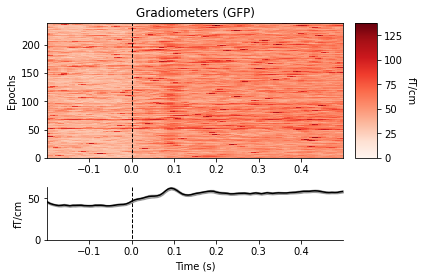

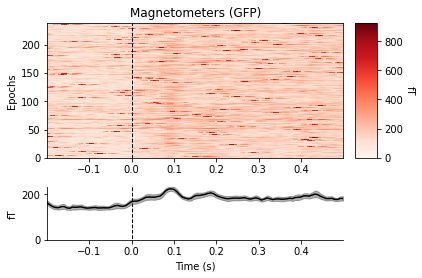

In [61]:
figs = epochs.plot_image()

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


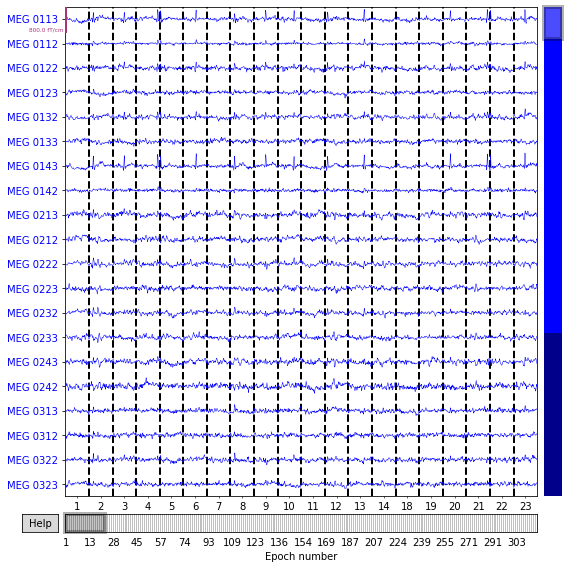

In [62]:
#%matplotlib qt
fig = epochs.plot()

### Average the epochs to get the evoked response (ERF/ERP), and plot it!

In [63]:
evoked = epochs.average()
print(evoked)

<Evoked | '0.28 × visual/left + 0.23 × visual/right + 0.23 × auditory/left + 0.26 × auditory/right' (average, N=239), -0.1998 – 0.49949 sec, baseline -0.199795 – 0 sec, 305 ch, ~3.4 MB>


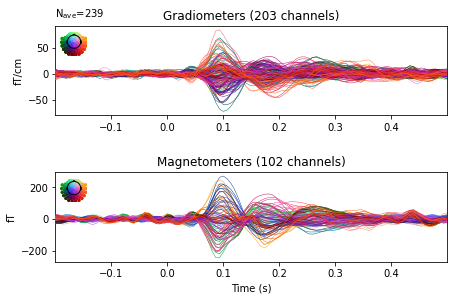

In [64]:
%matplotlib inline
fig = evoked.plot(spatial_colors=True)

This created an average across **all** conditions. Let's now estimate evoked responses for **individual** conditions.

In [65]:
print(event_id)

{'visual/left': 3, 'visual/right': 4, 'auditory/left': 1, 'auditory/right': 2}


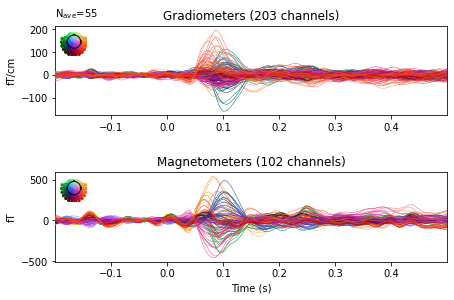

In [66]:
fig = epochs['auditory/left'].average().plot(spatial_colors=True)

## Accessing and indexing epochs by condition

Epochs can be indexed by integers or slices to select a subset of epochs but also with strings to select by conditions `epochs[condition]`

Remember `/` serves as a grouping operator. To calculate the evoked response across **all** "left" stimulations, do the following:

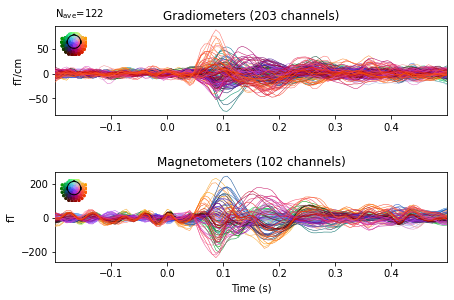

In [67]:
fig = epochs['left'].average().plot(spatial_colors=True);  # note the legend

In [79]:
# remember ...
event_id

{'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3, 'visual/right': 4}

In [80]:
epochs[0]  # first epoch

<Epochs |  1 events (all good), -0.199795 - 0.499488 sec, baseline -0.199795 – 0 sec, ~3.2 MB, data not loaded,
 'visual/left': 1>

In [81]:
epochs[:10]  # first 10 epochs

<Epochs |  10 events (all good), -0.199795 - 0.499488 sec, baseline -0.199795 – 0 sec, ~3.2 MB, data not loaded,
 'visual/left': 3
 'visual/right': 2
 'auditory/left': 3
 'auditory/right': 2>

In [82]:
epochs['visual/left']  # epochs for the left visual condition

<Epochs |  67 events (all good), -0.199795 - 0.499488 sec, baseline -0.199795 – 0 sec, ~3.2 MB, data not loaded,
 'visual/left': 67>

In event_id, `/` selects conditions in a hierarchical way, e.g. here, "auditory" vs. "visual", "left" vs. "right", and MNE can select them individually.

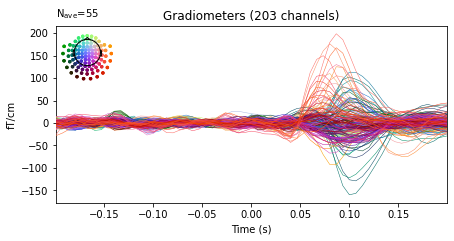

In [83]:
evoked_auditory_left = epochs['auditory/left'].average().pick_types(meg='grad')
evoked_auditory_left.crop(None, 0.2) # Beginning of evoked until 0.2s after stimulus onset.
fig = evoked_auditory_left.plot(spatial_colors=True)

In [84]:
epochs['visual']  # epochs for the visual condition (either left or right)

<Epochs |  123 events (all good), -0.199795 - 0.499488 sec, baseline -0.199795 – 0 sec, ~3.2 MB, data not loaded,
 'visual/left': 67
 'visual/right': 56>

In [85]:
epochs['left']

<Epochs |  122 events (all good), -0.199795 - 0.499488 sec, baseline -0.199795 – 0 sec, ~3.2 MB, data not loaded,
 'visual/left': 67
 'auditory/left': 55>

To access the data of some epochs use the `get_data` method.


In [86]:
epochs_data = epochs.get_data()
type(epochs_data), epochs_data.shape

(numpy.ndarray, (239, 306, 106))

`epochs_data` is a 3D array of dimension (239 epochs, 306 channels, 106 time instants).


## Visualize Topographies

First, let's plot an illustration of the sensor locations on the scalp

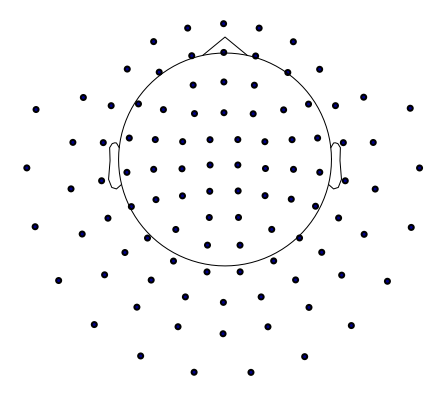

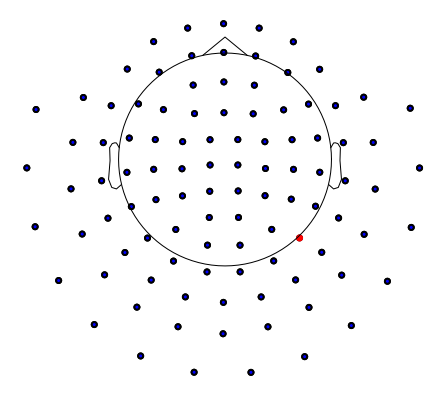

In [98]:
fig = raw.plot_sensors(ch_type='mag')
fig = raw.plot_sensors(ch_type='grad')

Now, let's plot the scalp topography at different time points. These topography plots called `topomap` in the MNE jargon.


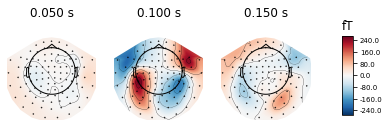

In [99]:
fig = evoked.plot_topomap(ch_type='mag', times=[0.05, 0.1, 0.15])

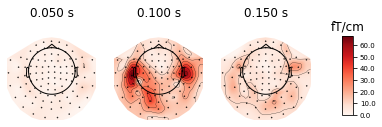

In [100]:
fig = evoked.plot_topomap(ch_type='grad', times=[0.05, 0.1, 0.15])

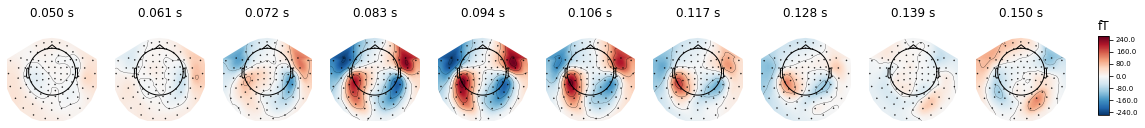

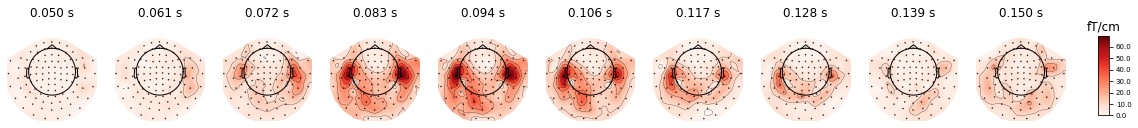

In [101]:
import numpy as np


times = np.linspace(0.05, 0.15, 10)

for ch_type in ('mag', 'grad'):
    fig = evoked.plot_topomap(times=times, ch_type=ch_type)

Topoplot and time series can also be shown in one single "joint" plot. By default, MNE will plot the topographies at the peaks of the time series signal.

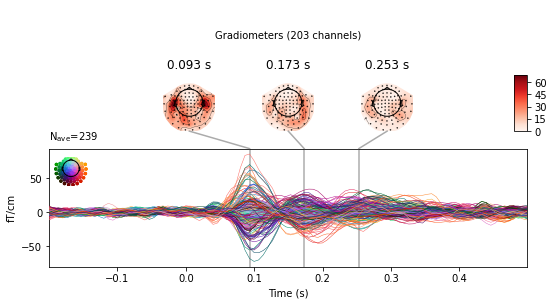

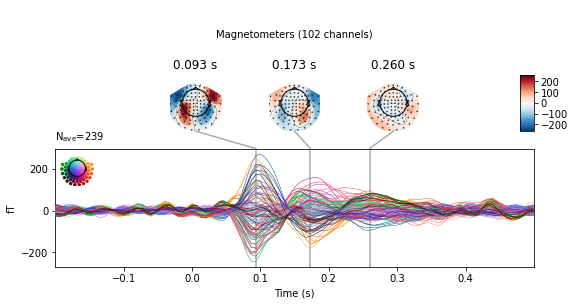

In [102]:
figs = evoked.plot_joint()

But of course, you can also specify custom time points for the topomaps.

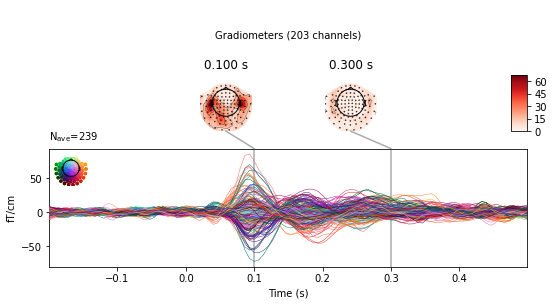

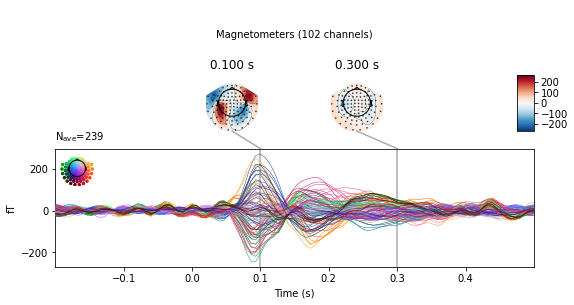

In [103]:
figs = evoked.plot_joint(times=[0.1, 0.3])

Let's visualize topomaps for all experimental conditions.

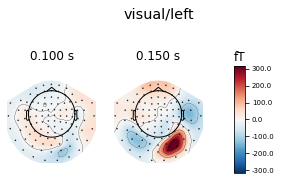

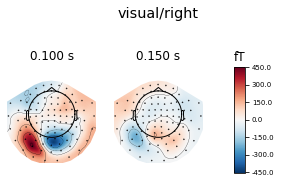

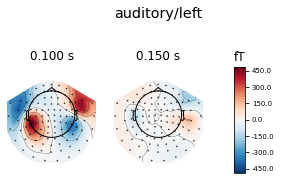

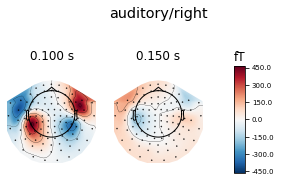

In [104]:
for condition in event_id:
    fig = epochs[condition].average().plot_topomap(times=[0.1, 0.15], title=condition)

### Compute a contrast:

In [105]:
evoked1 = epochs['left'].average()
evoked2 = epochs['right'].average()

contrast = mne.combine_evoked([evoked1, evoked2], weights=[1, -1])

Note that this combines evokeds taking into account the number of averaged epochs (to scale the noise variance)

In [106]:
print(evoked1.nave)  # average of 55 epochs
print(contrast.nave)  # average of 116 epochs

122
59.72384937238494


In [107]:
print(contrast)

<Evoked | '(0.55 × visual/left + 0.45 × auditory/left) - (0.48 × visual/right + 0.52 × auditory/right)' (average, N=59.72384937238494), -0.1998 – 0.49949 sec, baseline -0.199795 – 0 sec, 305 ch, ~3.4 MB>


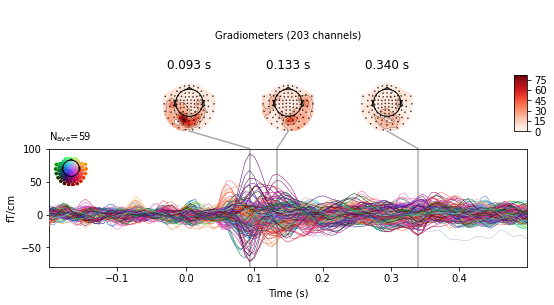

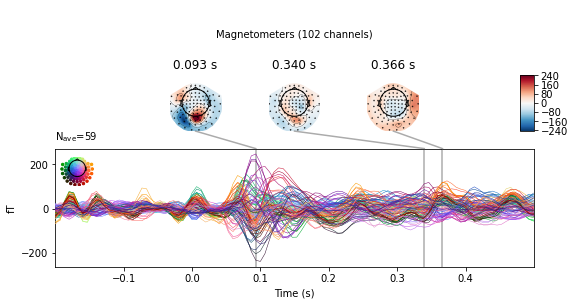

In [108]:
fig = contrast.plot_joint()

### EXERCISE
- Extract Epochs restricted to magnetometers on unfiltered data (`sample_audvis_raw.fif`)
- Construct epochs with a whole-epoch baseline. Then, high-pass filter raw data with a 1 Hz cutoff, construct epochs from that. Compare the resulting Evokeds (filter vs. baseline)
- Plot the difference between all *visual* and all *auditory* stimulus presentations
- Recompute everything for EEG